In [1]:
import pandas as pd
import geopandas
import folium

### Load districts from excel (gps coordinations)

In [3]:
# ?pd.read_excel
districts = pd.read_excel('data/districts.xlsx')
districts.head()

,obec,lat,lon,okres,ref,kraj
0,ABELOVA,48.41179,19.43460,606.0,SK0326,Banskobystrický kraj
1,ABOVCE,48.32291,20.34604,609.0,SK0329,Banskobystrický kraj
2,ABRAHAM,48.24642,17.61967,202.0,SK0212,Trnavský kraj
3,ABRAHAMOVCE,49.16146,21.34378,701.0,SK0411,Prešovský kraj
4,ABRAMOVA,48.93542,18.79531,509.0,SK0319,Žilinský kraj


### Load geofiles

In [4]:
# ?geopandas.read_file
districts_shp = geopandas.read_file('data/districts.shp', encoding = 'utf8')
districts_shp.head()

,Okres,REF,geometry
0,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556..."
1,Banská Štiavnica,SK0322,"POLYGON ((18.75064 48.41116, 18.75472 48.41284..."
2,Bardejov,SK0411,"POLYGON ((20.98654 49.30662, 20.99414 49.31268..."
3,Bratislava,SK0101,"POLYGON ((17.22444 48.19175, 17.22513 48.18639..."
4,Brezno,SK0323,"POLYGON ((19.35043 48.89758, 19.35652 48.90367..."


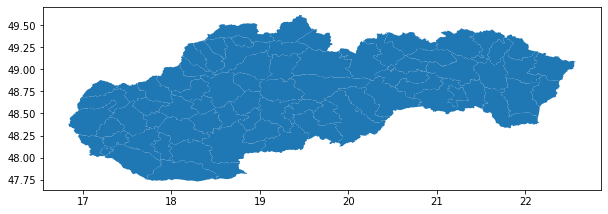

In [8]:
# ?geopandas.GeoDataFrame
districts_shp = geopandas.GeoDataFrame(districts_shp, geometry='geometry', crs = {'init': 'epsg:4326'})
districts_shp['geometry'] = districts_shp['geometry'].simplify(tolerance=0.001, preserve_topology=True)
districts_shp.crs = 'epsg:4326'
districts_shp.plot(figsize=(10,10))

### Load average wages in Slovakia (statdata.sk Mzdy zamestnancov podľa SK NACE Rev. 2 )

In [9]:
wages = pd.read_excel('data/averages-wages.xlsx')
wages.head()

,Ukazovateľ,Unnamed: 1,Priemerná nominálna mesačná mzda zamestnanca (Eur),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,2009,NaN,NaN,2010,NaN,NaN,2011,NaN,...,NaN,2016,NaN,NaN,2017,NaN,NaN,2018,NaN,NaN
1,NaN,NaN,Spolu,Muži,Ženy,Spolu,Muži,Ženy,Spolu,Muži,...,Ženy,Spolu,Muži,Ženy,Spolu,Muži,Ženy,Spolu,Muži,Ženy
2,Slovenská republika,Spolu,803,942,659,828,964,684,853,973,...,855,1 034,1 160,891,1 095,1 224,951,1 171,1 306,1 020
3,NaN,"Poľnohospodárstvo, lesníctvo a rybolov",587,619,510,608,634,538,703,738,...,722,848,891,739,903,943,799,978,1 024,862
4,NaN,Priemysel spolu,780,893,592,854,969,653,889,993,...,819,1 067,1 178,858,1 146,1 270,915,1 241,1 369,991
